[*********************100%***********************]  1 of 1 completed


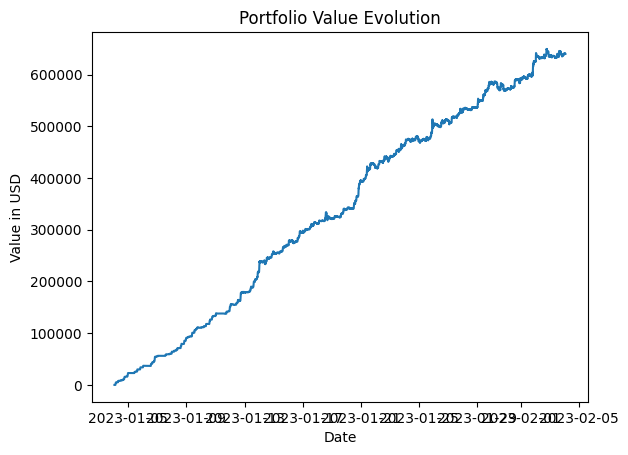

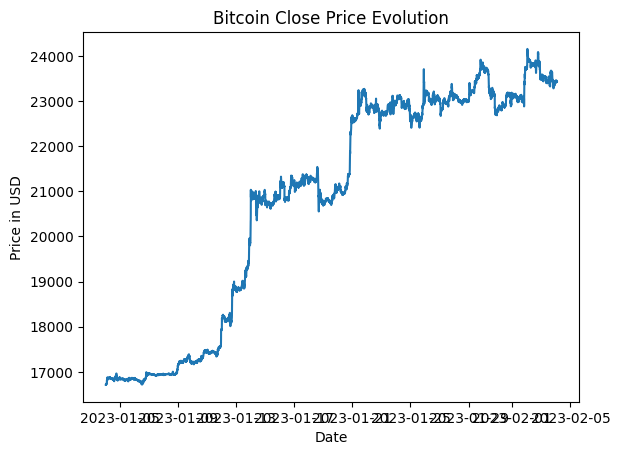

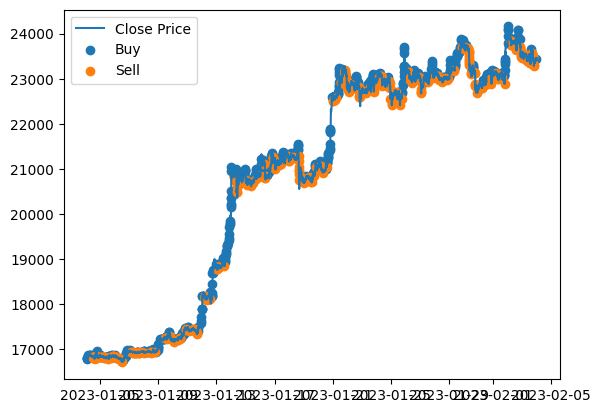

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download Bitcoin historical data
btc = yf.download('BTC-USD', period="1mo", interval="5m")

# Add Bollinger Bands and MACD indicator
window = 20
no_of_std = 2

btc['MA20'] = btc['Close'].rolling(window=window).mean()
btc['Upper_Band'] = btc['MA20'] + no_of_std * btc['Close'].rolling(window=window).std()
btc['Lower_Band'] = btc['MA20'] - no_of_std * btc['Close'].rolling(window=window).std()

btc['26_EMA'] = btc['Close'].ewm(span=26).mean()
btc['12_EMA'] = btc['Close'].ewm(span=12).mean()
btc['MACD'] = btc['12_EMA'] - btc['26_EMA']
btc['Signal_Line'] = btc['MACD'].ewm(span=9).mean()

# Add Buy and Sell signals
btc['Buy'] = np.where((btc['Close'] > btc['Upper_Band']) & (btc['MACD'] > btc['Signal_Line']), 1, 0)
btc['Sell'] = np.where((btc['Close'] < btc['Lower_Band']) & (btc['MACD'] < btc['Signal_Line']), 1, 0)

# Add Portfolio evolution
btc['Shares'] = np.where(btc['Buy'] == 1, 1000 / btc['Close'], 0)
btc['Shares'] = np.where(btc['Sell'] == 1, -btc['Shares'], btc['Shares'])
btc['Shares'] = btc['Shares'].cumsum()
btc['Portfolio_Value'] = btc['Shares'] * btc['Close']

# Plot Portfolio Value evolution
plt.plot(btc['Portfolio_Value'])
plt.title('Portfolio Value Evolution')
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.show()

# Plot Bitcoin Close Price evolution
plt.plot(btc['Close'])
plt.title('Bitcoin Close Price Evolution')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

# Plot Buy and Sell signals on Bitcoin Close Price
plt.plot(btc['Close'], label='Close Price')
plt.scatter(btc.loc[btc['Buy'] == 1].index, btc.loc[btc['Buy'] == 1]['Close'], label='Buy')
plt.scatter(btc.loc[btc['Sell'] == 1].index, btc.loc[btc['Sell'] == 1]['Close'], label='Sell')
plt.legend()
plt.show()
